In [21]:
import fenics as fe

In [22]:
import matplotlib.pyplot as plt

In [23]:
import numpy as np

In [24]:
import fenics as fe

In [25]:
def semiphasefieldwithenthalpy(N):
    phi=[]
    h=np.empty(N)
    phi=np.linspace(0,1,30)
    phi[0:N/3]=0
    h[0:N/3]=np.linspace(-N/3,0,N/3)
    phi[(2*N)/3:N]=1
    h[(2*N)/3:N]=np.linspace(N/3,(2*N)/3,N/3)
    phi[N/3:(2*N)/3]=np.linspace(0.01,0.99,N/3)
    h[N/3:(2*N)/3]=np.linspace(0,N/3,N/3)
    plt.plot(h,phi)    
    plt.ylim([0,2])
    plt.show()    
    h1=h
    return [phi,h1]

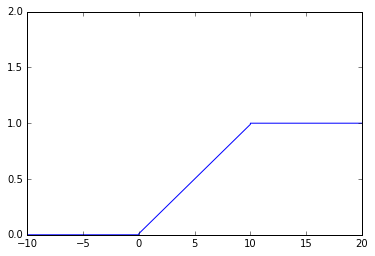

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01      ,  0.11888889,  0.22777778,  0.33666667,  0.44555556,
         0.55444444,  0.66333333,  0.77222222,  0.88111111,  0.99      ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]),
 array([-10.        ,  -8.88888889,  -7.77777778,  -6.66666667,
         -5.55555556,  -4.44444444,  -3.33333333,  -2.22222222,
         -1.11111111,   0.        ,   0.        ,   1.11111111,
          2.22222222,   3.33333333,   4.44444444,   5.55555556,
          6.66666667,   7.77777778,   8.88888889,  10.        ,
         10.        ,  11.11111111,  12.22222222,  13.33333333,
         14.44444444,  15.55555556,  16.66666667,  17.77777778,
         18.88888889,  20.        ])]

In [26]:
semiphasefieldwithenthalpy(30)

# Now the Temperature with respect  to enthalpy

In [27]:
def Temperaturewithenthalpy1(N):
    phi,h=semiphasefieldwithenthalpy(N)
    L=6
    c=1
    T={}
    T=np.linspace(0,200,N)
    T[0:N/3]=np.linspace(0,99,N/3)
    T[(2*N)/3:N]=np.linspace(101,200,N/3)
    T[(N/3):(2*N)/3]=100
    plt.plot(h,T)    
    #plt.ylim([0,2])
    plt.show()    
    return T
    T=np.linspace(0,200,N)
    T[0:N/3]=np.linspace(0,99,N/3)
    T[(2*N)/3:N]=np.linspace(101,200,N/3)
    T[(N/3):(2*N)/3]=100
    plt.plot(h,T)    
    #plt.ylim([0,2])
    plt.show()    
    return T

In [28]:
def Temperaturewithenthalpy2(N):
    phi,h=semiphasefieldwithenthalpy(N)
    L=10;
    c=1;
    T={}
    T=(h-(phi*L))/c
    plt.plot(h,T)    
    #plt.ylim([0,2])
    plt.show()    
    return T   

In [29]:
def diffoftemperaturewrtenthalpy(N):
    T=Temperaturewithenthalpy2(N)
    phi,h=semiphasefieldwithenthalpy(N)
    hnew=np.max(h)
    return (T[1]-T[0])/hnew

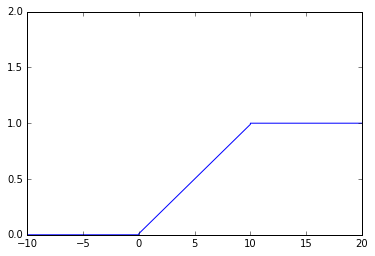

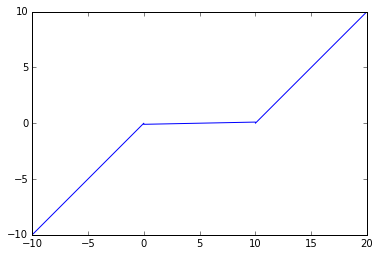

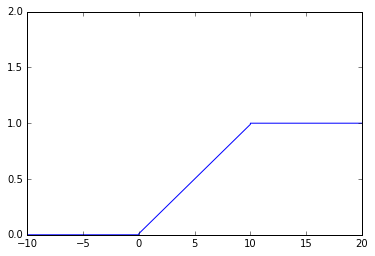

TypeError: 'numpy.ndarray' object is not callable

In [30]:
Mesh_size=1000
mesh = fe.UnitIntervalMesh(Mesh_size)
P1 = fe.FiniteElement('P', mesh.ufl_cell(), 1)
V = fe.FunctionSpace(mesh, P1)
T = fe.Function(V)
h = fe.Function(V)
T=Temperaturewithenthalpy2(30)
hot_wall_temperature = 1.
T_h = fe.Constant(hot_wall_temperature)
cold_wall_temperature = -0.01
T_c = fe.Constant(cold_wall_temperature)
initial_melt_thickness = 10./float(Mesh_size)
T_n = fe.interpolate(
    fe.Expression(
        "(T_h - T_c)*(x[0] < x_m0) + T_c",
        T_h = hot_wall_temperature, 
        T_c = cold_wall_temperature,
        x_m0 = initial_melt_thickness,
        element = P1),
    V)
def phi(T):
    T_r=0
    r=0.025
    return 0.5*(1. + fe.tanh((T_r - T)/r))
def diffofenthalpywithtime(N):
    dt=fe.Constant(1.e-2)
    T_t = (T - T_n)/dt
    phi_t = (phi(T) - phi(T_n))/dt
    c=1
    L=10
    return (c*T_t-(L*phi_t))
mesh = fe.UnitIntervalMesh(Mesh_size)
P1 = fe.FiniteElement('P', mesh.ufl_cell(), 1)
V = fe.FunctionSpace(mesh, P1)
v = fe.TestFunction(V)
phi,h=semiphasefieldwithenthalpy(30)
ste=fe.Constant(0.045)
prandl_number=fe.Constant(1)
diffh=diffofenthalpywithtime(30)
rho=1
K=1
F=fe.dot(fe.grad(v),(fe.grad(h)-L*fe.grad(phi)))-(rho/K)*(v*diffh)
JF = fenics.derivative(F, h, fenics.TrialFunction(V))
